# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

In [2]:
df = pd.read_csv('previsao_da_renda.csv')
df = df.drop(['Unnamed: 0', 'index'], axis=1)
df.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [25]:
df = df.select_dtypes(exclude=['object', 'bool'])
df.dtypes

Unnamed: 0                 int64
index                      int64
qtd_filhos                 int64
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object

In [26]:
df.corr()

,Unnamed: 0,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
Unnamed: 0,1.000000,-0.001868,0.015612,-0.004328,-0.002146,0.016628,0.007646
index,-0.001868,1.000000,0.039734,-0.047971,-0.034574,0.041818,-0.001740
qtd_filhos,0.015612,0.039734,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.004328,-0.047971,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.002146,-0.034574,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.016628,0.041818,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.007646,-0.001740,0.009567,0.042570,0.394235,0.020977,1.000000


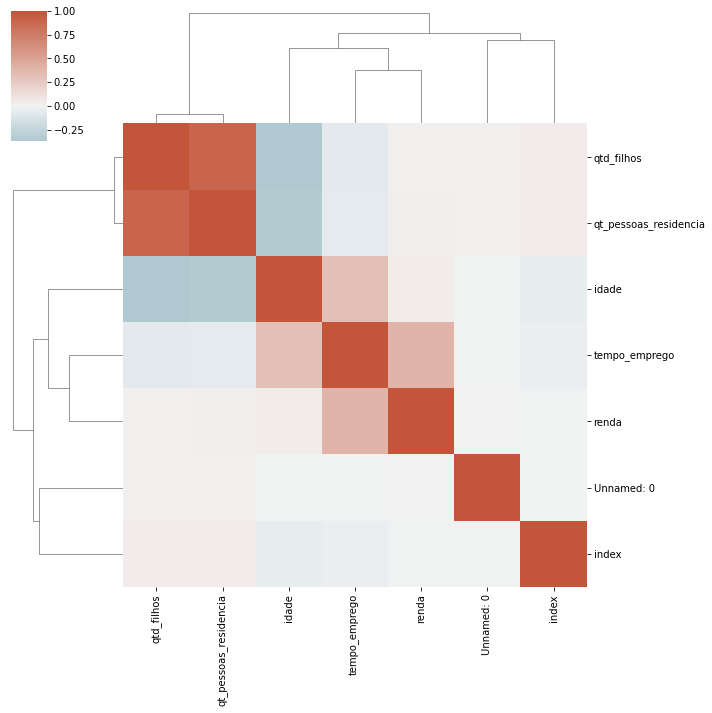

In [27]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.clustermap(df.corr(), figsize=(10, 10), center = 0, cmap=cmap)

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

,x,y
x,1.000000,0.394235
y,0.394235,1.000000


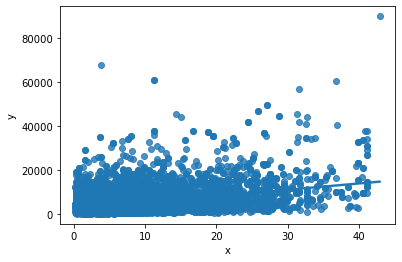

In [7]:
x = df['tempo_emprego']
y = df['renda']

df = pd.DataFrame({'x':x, 'y':y})
_ = sns.regplot(x='x', y='y', data =df )
df.corr()

,x,y
x,1.00000,0.04257
y,0.04257,1.00000


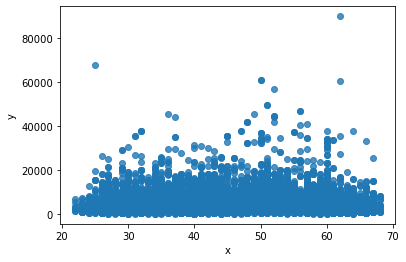

In [3]:
x = df['idade']
y = df['renda']

df = pd.DataFrame({'x':x, 'y':y})
_ = sns.regplot(x='x', y='y', data =df )
df.corr()

3) Na su aopinião, há outliers na variável renda?

Sim, a variável renda apresenta Outliers. Desse modo podemos notar nos gráficos anteriores que os dois apresentaram dados discrepanetes.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [4]:
df_log = df.copy()
df_log['log_y'] = np.log(df_log['renda'])
df_log.corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,log_y
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414,0.090529
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827,0.045297
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567,0.023743
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570,0.024712
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235,0.379556
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977,0.036267
mau,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577,-0.014193
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000,0.835734
log_y,0.090529,0.045297,0.023743,0.024712,0.379556,0.036267,-0.014193,0.835734,1.000000


,x,log_y
x,1.000000,0.024712
log_y,0.024712,1.000000


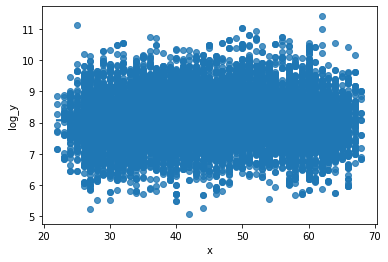

In [5]:
x = df_log['idade']
y = df_log['log_y']

df_log = pd.DataFrame({'x':x, 'log_y':y})
_ = sns.regplot(x='x', y='log_y', data =df_log )
df_log.corr()

,tempo_emprego,log_y
tempo_emprego,1.000000,0.379556
log_y,0.379556,1.000000


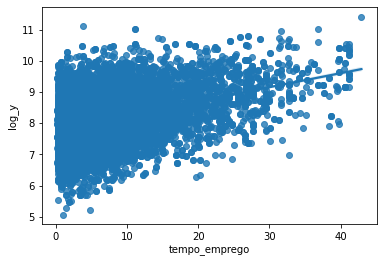

In [5]:
x = df_log['tempo_emprego']
y = df_log['log_y']

df_log = pd.DataFrame({'tempo_emprego': x, 'log_y': y})
_ = sns.regplot(x='tempo_emprego', y='log_y', data=df_log)
df_log.corr()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Sim, uso do LOG é uma das opções para arrumar os outliers, como também temos inúmeras possibilidade de arrumar este impasse. Desse modo, a escolher para organizar a base de dados vai do pesquisador que trabalha nela.